Dataset: LEGO Database, downloaded from Kaggle.com on 3.12.2024 <br><br>https://www.kaggle.com/datasets/rtatman/lego-database

## Exercise Steps

1. Select a dataset - any dataset! Make sure it's not too dirty, as this case study is
about storytelling, not cleaning... :) <br>
2. Pick your audience: executive, technical, or non-technical; and adjust your tone
accordingly.<br>
3. Take a look at the data: explore it.<br>
4. Think of a narrative, and pursue it.<br>
5. Give a 15 mins presentation to your mentor during your next call. 


What questions arise from looking at the data?<br><br>
  Can I count something interesting?
<br>  Can I find trends (e.g. high, low, increasing, decreasing, anomalies)?
<br>  Can I make a bar plot or a histogram?
<br>  Can I compare two related quantities?
<br>  Can I make a scatterplot?
<br>  Can I make a time-series plot?
<br>  Looking at the plots, what are some insights I can make?
<br>  Can I see any correlations?
<br>  Is there a hypothesis I can - and should - investigate further?
<br>  What other questions are the insights leading me to ask?

### Question/Story

How have the number of themes changed over time?

### Imports

In [204]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Downloads from Kaggle include multiple tables and schema showing how they connect.

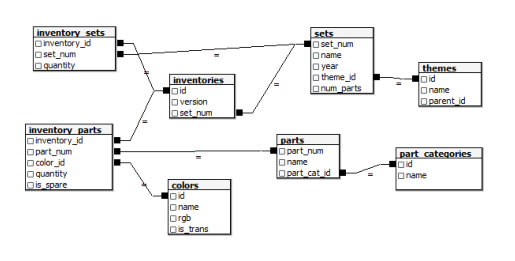

In [205]:
# look at schema to identify target categories.

image = mpimg.imread("downloads_schema.png")
plt.imshow(image)
plt.axis('off')
plt.show()

"quantity" column in inventory_parts shows how many of the part in the set. (per Kaggle page)<br><br>
"quantity" column in inventory_sets shows how many sets per box. (per Kaggle page)<br><br>
My question involves number of themes (count unique ID/name from the themes table) over time (year in sets table). It's possible that the other tables might tell a more complete story (does the prevalence fo the Star Wars theme mean more black/gray bricks, etc) but those are my two target features.<br><br>For the purposes of this assignment, I only need to join themes and sets.

#### Organization and cleanup

In [206]:
themes = pd.read_csv('themes.csv')
sets = pd.read_csv('sets.csv')

In [207]:
#standardize column names

themes = themes.add_prefix('theme_')

In [208]:
lego_df = sets.merge(themes, how='left', on='theme_id')

In [209]:
lego_df.dtypes

set_num             object
name                object
year                 int64
theme_id             int64
num_parts            int64
theme_name          object
theme_parent_id    float64
dtype: object

In [210]:
lego_df.head()

,set_num,name,year,theme_id,num_parts,theme_name,theme_parent_id
0,00-1,Weetabix Castle,1970,414,471,Castle,411.0
1,0011-2,Town Mini-Figures,1978,84,12,Supplemental,67.0
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2,Lion Knights,186.0
3,0012-1,Space Mini-Figures,1979,143,12,Supplemental,126.0
4,0013-1,Space Mini-Figures,1979,143,12,Supplemental,126.0


### Trends over time

In [211]:
lego_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11673 entries, 0 to 11672
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   set_num          11673 non-null  object 
 1   name             11673 non-null  object 
 2   year             11673 non-null  int64  
 3   theme_id         11673 non-null  int64  
 4   num_parts        11673 non-null  int64  
 5   theme_name       11673 non-null  object 
 6   theme_parent_id  8046 non-null   float64
dtypes: float64(1), int64(3), object(3)
memory usage: 638.5+ KB


#### Do total sets produced and total themes produced grow at the same rate?

In [212]:
# want to plot counts of color_id, set_num over time (year) and a zoom in of the last 10 years.

summ = pd.pivot_table(lego_df, values = ['theme_id', 'set_num'], 
                      index = 'year', aggfunc = lambda x: len(x.unique()))

In [213]:
summ.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66 entries, 1950 to 2017
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   set_num   66 non-null     int64
 1   theme_id  66 non-null     int64
dtypes: int64(2)
memory usage: 1.5 KB


In [214]:
summ.rename(columns={"theme_id": "theme_count", "set_num": "set_count"}, inplace = True)
summ

,set_count,theme_count
year,,
1950,7,2
1953,4,1
1954,14,2
1955,28,4
1956,12,3
...,...,...
2013,593,93
2014,713,92
2015,665,98


In [215]:
summ_last_10 = summ.tail(10)

<Axes: xlabel='year'>

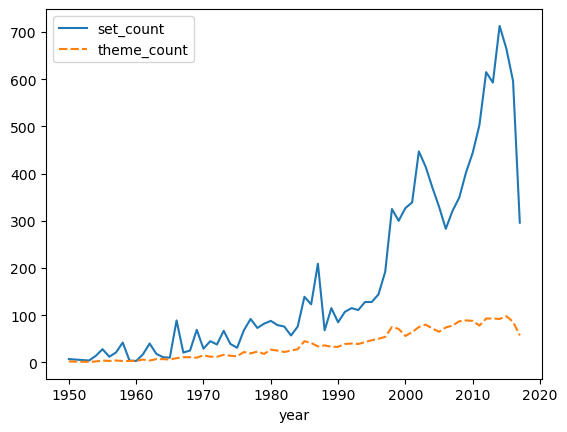

In [216]:
sns.lineplot(data=summ)

<Axes: xlabel='year', ylabel='theme_count'>

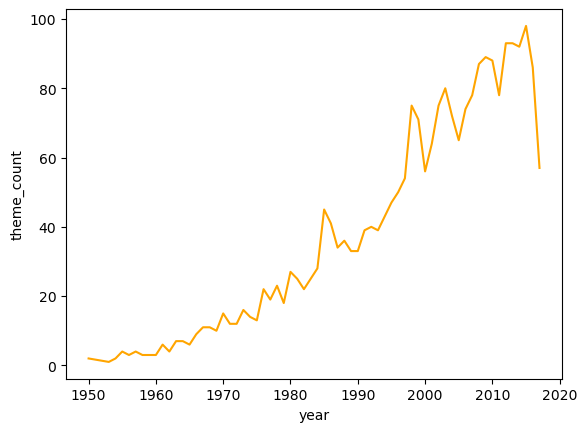

In [217]:
sns.lineplot(summ['theme_count'], color = 'orange')

<Axes: xlabel='year'>

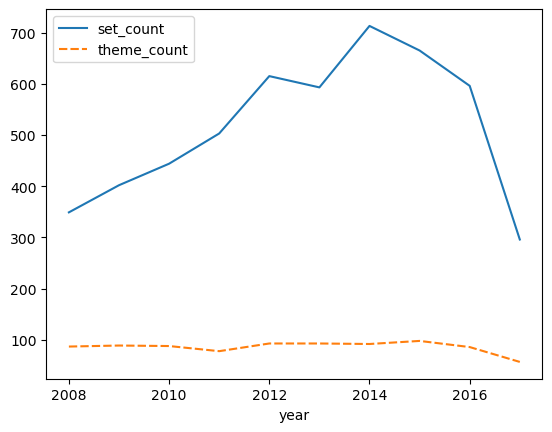

In [218]:
sns.lineplot(data=summ_last_10)

<Axes: xlabel='year', ylabel='theme_count'>

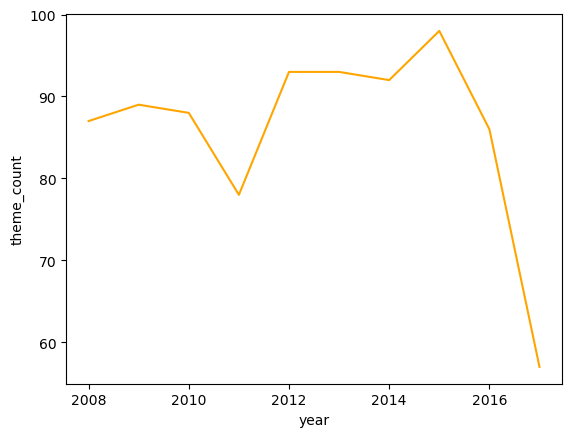

In [219]:
sns.lineplot(summ_last_10['theme_count'], color = 'orange')

In [220]:
summ.describe()

,set_count,theme_count
count,66.000000,66.000000
mean,176.863636,37.757576
std,189.203910,30.721108
min,3.000000,1.000000
25%,38.250000,11.000000
50%,88.500000,30.500000
75%,315.750000,64.750000
max,713.000000,98.000000


In [221]:
summ_last_10.describe()

,set_count,theme_count
count,10.000000,10.000000
mean,517.600000,86.100000
std,140.535642,11.532081
min,296.000000,57.000000
25%,412.500000,86.250000
50%,548.000000,88.500000
75%,610.250000,92.750000
max,713.000000,98.000000


In [222]:
# last 10 years are significantly different than complete dataset, want to calc growth rates

summ['theme_growth'] = summ['theme_count'].pct_change(periods=1) * 100

In [223]:
# sanity check

summ.head()

,set_count,theme_count,theme_growth
year,,,
1950,7,2,NaN
1953,4,1,-50.0
1954,14,2,100.0
1955,28,4,100.0
1956,12,3,-25.0


In [224]:
summ['set_growth'] = summ['set_count'].pct_change(periods=1) * 100

<Axes: xlabel='year'>

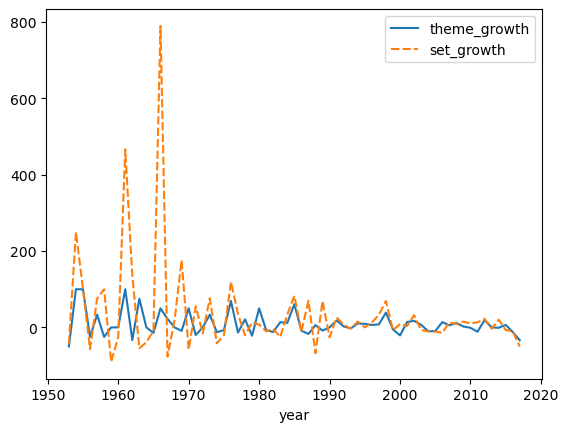

In [225]:
sns.lineplot(summ[['theme_growth', 'set_growth']])

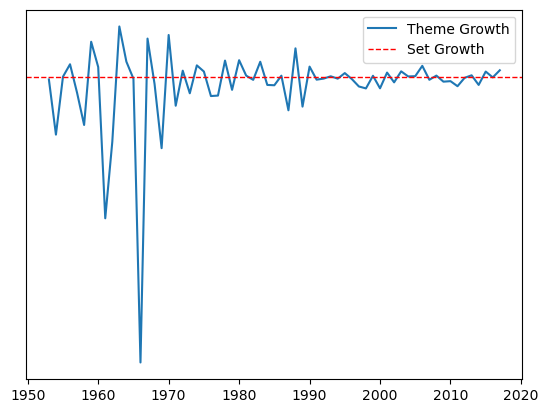

In [226]:
#is growth of colors keeping up with growth of sets? 

summ['theme_set_diff'] = summ['theme_growth'] - summ['set_growth']
ax = sns.lineplot(summ['theme_set_diff'], label = 'Theme Growth')
ax.axhline(y=0, linewidth=1, color='red', ls='--', label = 'Set Growth')
plt.xlabel('')
plt.ylabel('')
plt.yticks([])

plt.legend()

In [227]:
summ.describe()

,set_count,theme_count,theme_growth,set_growth,theme_set_diff
count,66.000000,66.000000,65.000000,65.000000,65.000000
mean,176.863636,37.757576,9.128020,33.296331,-24.168310
std,189.203910,30.721108,31.205047,124.971620,114.782543
min,3.000000,1.000000,-50.000000,-90.476190,-740.000000
25%,38.250000,11.000000,-9.722222,-14.242424,-25.333333
50%,88.500000,30.500000,0.000000,7.476636,-4.912533
75%,315.750000,64.750000,17.187500,33.333333,13.825503
max,713.000000,98.000000,100.000000,790.000000,130.000000


In [228]:
# updating last 10

summ_last_10 = summ.tail(10)
summ_last_10.describe()

,set_count,theme_count,theme_growth,set_growth,theme_set_diff
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,517.600000,86.100000,-1.993851,1.912666,-3.906517
std,140.535642,11.532081,14.642448,21.500903,13.721062
min,296.000000,57.000000,-33.720930,-50.335570,-24.651925
25%,412.500000,86.250000,-8.803626,-5.943397,-12.558386
50%,548.000000,88.500000,-0.537634,9.585251,-2.452295
75%,610.250000,92.750000,5.466017,14.711757,3.386857
max,713.000000,98.000000,19.230769,22.266402,16.614640


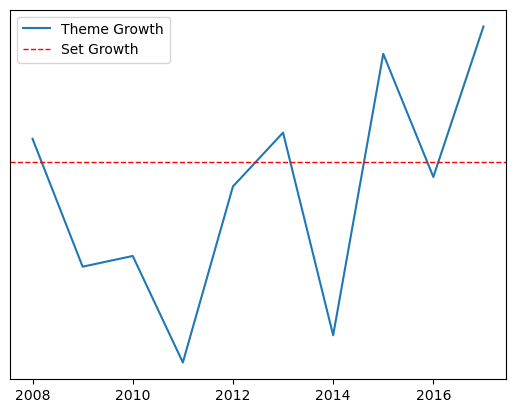

In [229]:
ax = sns.lineplot(summ_last_10['theme_set_diff'], label = 'Theme Growth')
ax.axhline(y=0, linewidth=1, color='red', ls='--', label = 'Set Growth')
plt.xlabel('')
plt.ylabel('')
plt.yticks([])

plt.legend()

#### What was the most popular theme each year?

In [230]:
popular = lego_df[['year', 'theme_name']]
popular.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11673 entries, 0 to 11672
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   year        11673 non-null  int64 
 1   theme_name  11673 non-null  object
dtypes: int64(1), object(1)
memory usage: 182.5+ KB


In [231]:
popular.head()

,year,theme_name
0,1970,Castle
1,1978,Supplemental
2,1987,Lion Knights
3,1979,Supplemental
4,1979,Supplemental


In [232]:
popular = pd.get_dummies(popular, dtype=int, prefix = '', prefix_sep = '')

In [233]:
popular = popular.groupby(['year']).sum()

In [234]:
popular.head()

,12V,4 Juniors,4.5V,9V,Advent,Advent Sub-Set,Adventurers,Agents,Agori,Airjitzu,...,Williams F1,Wolfpack,Wooden Box Set,World City,World Racers,X-Men,X-Pod,Xalax,Znap,eLAB
year,,,,,,,,,,,,,,,,,,,,,
1950,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1953,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1954,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1955,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1956,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [235]:
popular['max_occurences'] = popular.max(axis=1)

In [236]:
popular['max_theme'] = popular.idxmax(axis=1)

In [237]:
popular.tail()

,12V,4 Juniors,4.5V,9V,Advent,Advent Sub-Set,Adventurers,Agents,Agori,Airjitzu,...,Wooden Box Set,World City,World Racers,X-Men,X-Pod,Xalax,Znap,eLAB,max_occurences,max_theme
year,,,,,,,,,,,,,,,,,,,,,
2013,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,44,Friends
2014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,63,Gear
2015,0,0,0,0,0,0,0,0,0,6,...,0,0,0,0,0,0,0,0,51,Friends
2016,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,51,Nexo Knights
2017,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,44,Batman


Text(0.5, 1.0, 'Sets per bestselling theme')

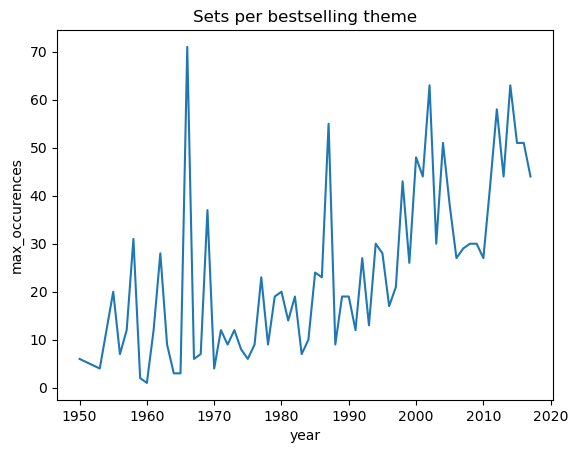

In [238]:
sns.lineplot(popular['max_occurences']).set_title('Sets per bestselling theme')

#### Most popular themes over time

In [239]:
all_totals = popular.T
last_10_totals = popular.tail(10).T
all_totals.tail()

year,1950,1953,1954,1955,1956,1957,1958,1959,1960,1961,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Xalax,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Znap,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
eLAB,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
max_occurences,6,4,12,20,7,12,31,2,1,12,...,30,30,27,42,58,44,63,51,51,44
max_theme,Supplemental,Supplemental,Supplemental,Supplemental,Supplemental,Town Plan,Supplemental,Supplemental,Books,Supplemental,...,City,City,City,Ninjago,Friends,Friends,Gear,Friends,Nexo Knights,Batman


In [240]:
all_totals.drop(all_totals.tail(2).index, inplace = True)
last_10_totals.drop(last_10_totals.tail(2).index, inplace = True)
all_totals.tail()

year,1950,1953,1954,1955,1956,1957,1958,1959,1960,1961,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
X-Men,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,1,0,0,0
X-Pod,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Xalax,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Znap,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
eLAB,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [241]:
all_totals['Total Sets'] = all_totals.sum(axis=1)
last_10_totals['Total Sets'] = last_10_totals.sum(axis=1)
all_totals.head()

year,1950,1953,1954,1955,1956,1957,1958,1959,1960,1961,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Total Sets
12V,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,50
4 Juniors,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4.5V,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,88
9V,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,53
Advent,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,3


In [242]:
y1950_totals = all_totals[1950].reset_index()
y2017_totals = all_totals[2017].reset_index()


In [243]:
y1950_totals = y1950_totals.sort_values(by = 1950, ascending = False)
y2017_totals = y2017_totals.sort_values(by = 2017, ascending = False)
y1950_totals.head()

,index,1950
320,Supplemental,6
30,Basic Set,1
0,12V,0
264,Series 17 Minifigures,0
262,Series 15 Minifigures,0


In [244]:
y1950_totals = y1950_totals.iloc[:5]
y2017_totals = y2017_totals.iloc[:5]
print(y1950_totals)
print(y2017_totals)

                     index 1950
320           Supplemental    6
30               Basic Set    1
0                      12V    0
264  Series 17 Minifigures    0
262  Series 15 Minifigures    0
                     index 2017
32                  Batman   44
200           Nexo Knights   19
264  Series 17 Minifigures   18
110                Friends   18
302              Star Wars   16


In [245]:
y1950_totals = y1950_totals.iloc[:2]
print(y1950_totals)

            index 1950
320  Supplemental    6
30      Basic Set    1


(array([0, 1]), [Text(0, 0, 'Supplemental'), Text(1, 0, 'Basic Set')])

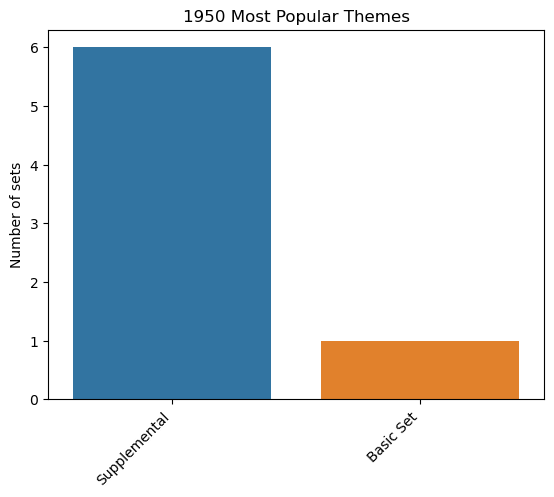

In [246]:
sns.barplot(y1950_totals, x = 'index', y = 1950)

plt.title('1950 Most Popular Themes')
plt.xlabel('')
plt.ylabel("Number of sets")
plt.xticks(rotation=45, ha = 'right')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Batman'),
  Text(1, 0, 'Nexo Knights'),
  Text(2, 0, 'Series 17 Minifigures'),
  Text(3, 0, 'Friends'),
  Text(4, 0, 'Star Wars')])

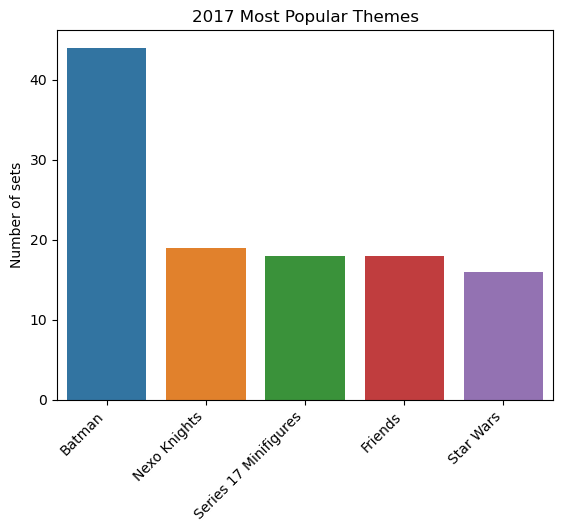

In [247]:
sns.barplot(y2017_totals, x = 'index', y = 2017)

plt.title('2017 Most Popular Themes')
plt.xlabel('')
plt.ylabel("Number of sets")
plt.xticks(rotation=45, ha = 'right')

In [248]:
all_totals = all_totals['Total Sets'].reset_index()
last_10_totals = last_10_totals['Total Sets'].reset_index()
all_totals.head()

,index,Total Sets
0,12V,50
1,4 Juniors,2
2,4.5V,88
3,9V,53
4,Advent,3


In [249]:
all_totals = all_totals.sort_values(by = 'Total Sets', ascending = False)
last_10_totals = last_10_totals.sort_values(by = 'Total Sets', ascending = False)
all_totals.head()

,index,Total Sets
320,Supplemental,496
322,Technic,435
56,City,287
110,Friends,269
30,Basic Set,257


In [250]:
all_totals = all_totals.iloc[:10]
last_10_totals = last_10_totals.iloc[:10]
print(all_totals)

             index Total Sets
320   Supplemental        496
322        Technic        435
56            City        287
110        Friends        269
30       Basic Set        257
70         Creator        249
117           Gear        246
281  Service Packs        242
89           Duplo        219
302      Star Wars        211


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Supplemental'),
  Text(1, 0, 'Technic'),
  Text(2, 0, 'City'),
  Text(3, 0, 'Friends'),
  Text(4, 0, 'Basic Set'),
  Text(5, 0, 'Creator'),
  Text(6, 0, 'Gear'),
  Text(7, 0, 'Service Packs'),
  Text(8, 0, 'Duplo'),
  Text(9, 0, 'Star Wars')])

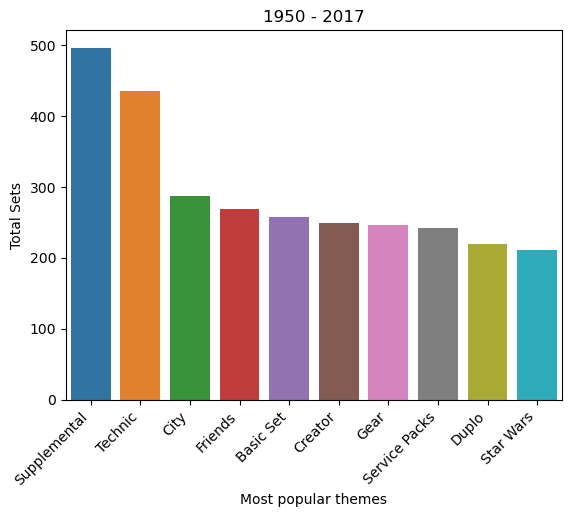

In [251]:
sns.barplot(all_totals, x = 'index', y = 'Total Sets')

plt.title('1950 - 2017')
plt.xlabel("Most popular themes")
plt.xticks(rotation=45, ha = 'right')

In [252]:
supplemental = lego_df[lego_df['theme_name'] == 'Supplemental']

In [253]:
len(supplemental)

496

In [254]:
print(supplemental.head(25))

      set_num                               name  year  theme_id  num_parts  \
1      0011-2                  Town Mini-Figures  1978        84         12   
3      0012-1                 Space Mini-Figures  1979       143         12   
4      0013-1                 Space Mini-Figures  1979       143         12   
5      0014-1                 Space Mini-Figures  1979       143         12   
6      0015-1                 Space Mini-Figures  1979       143         18   
245     103-1  4.5V Motor Set with Rubber Tracks  1969       473         24   
246    1031-1              Building Cards - 1030  1983       532         20   
248    1033-1              Building Cards - 1032  1985       532         20   
249    1034-1              Teachers Resource Set  1985       532       1534   
412     107-1                     4.5V Motor Set  1976       473         31   
457    1077-1                  Supplementary Set  1976       528        170   
530    1129-1         Storage Cloth (Spread Bag)  19

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Friends'),
  Text(1, 0, 'Gear'),
  Text(2, 0, 'City'),
  Text(3, 0, 'Star Wars'),
  Text(4, 0, 'Ninjago'),
  Text(5, 0, 'Duplo'),
  Text(6, 0, 'Creator'),
  Text(7, 0, 'Key Chain'),
  Text(8, 0, 'Police'),
  Text(9, 0, 'LEGO Brand Store')])

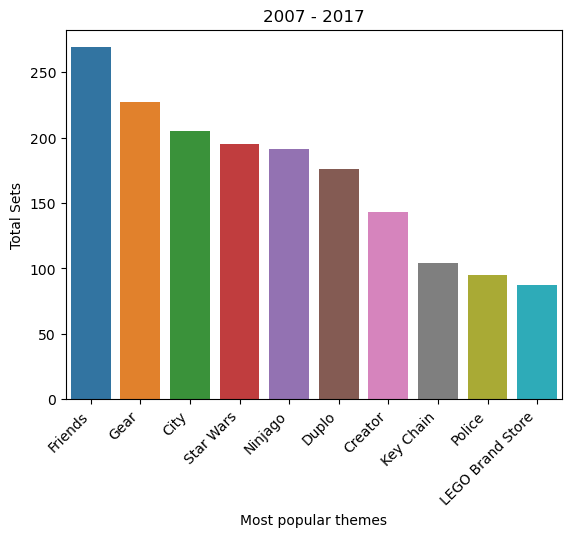

In [255]:
sns.barplot(last_10_totals, x = 'index', y = 'Total Sets')

plt.title('2007 - 2017')
plt.xlabel("Most popular themes")
plt.xticks(rotation=45, ha = 'right')

### Ideas for further exploration:

- data is now 8 years old, is it worth it to redownload data to get more post-2016 years?
- were themes renamed? is some of this duplicate data, or are some of these themes sub-categories of bigger ones?
- Do the themes dictate how many colors are needed? does the popularity of a given theme affect the number of colors?